In [1]:
# import resources
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import dtale
import pingouin as pg

In [2]:
# import resources
%matplotlib inline
#df = pd.read_excel("אינטייק תחילת טיפול 210423.xlsx")
df = pd.read_excel("אינטייק תחילת טיפול 210423 - עם השלמות.xlsx")

In [3]:
print(*enumerate(df.columns), sep='\n')

rename = {
    df.columns[0] : 'id',
    df.columns[1]: 'intake_date',
    df.columns[2]: 'treatment_start_date',
    df.columns[3]: 'treatment_type',
}


(0, 'Unnamed: 0')
(1, 'תאריך אינטייק\nקליני')
(2, 'תאריך תחילת טיפול במרפאה')
(3, 'סוג טיפול (IPT מקוצר, IPT רגיל, TAU)')


In [4]:
df = df.rename(rename, axis=1)
print(*enumerate(df.columns), sep='\n')
print('\n', df.dtypes)

(0, 'id')
(1, 'intake_date')
(2, 'treatment_start_date')
(3, 'treatment_type')

 id                              object
intake_date             datetime64[ns]
treatment_start_date    datetime64[ns]
treatment_type                  object
dtype: object


In [5]:
treatment_types = list(df.treatment_type.unique())
rename_types = {
    treatment_types[1]: 'IPT-SCI', #'IPT מקוצר'
    treatment_types[2]: 'TAU', #TAU
    treatment_types[3]: 'TAU', # 'IPT רגיל'
    treatment_types[4]: 'IPT-SCI', #'IPT SCI'
    treatment_types[5]: 'IPT-SCI', #'מקוצר'
    treatment_types[6]: 'IPT-SCI', #'ipt מקוצר'
}

df['treatment_type_renamed'] = df.treatment_type.map(rename_types)

In [6]:
df = df.dropna(subset = ['treatment_start_date', 'intake_date'], how='any')

df = df[~(df['treatment_start_date'] < df['intake_date'])]

df['treatment_start_year'] = df['treatment_start_date'].dt.year

In [7]:
delta = df['treatment_start_date'] - df['intake_date'] 
df['waiting_duration_days'] = delta.dt.days
df['waiting_duration_weeks'] = df['waiting_duration_days'] / 7

In [8]:
df = df[(df.treatment_start_year < 2023)]


treatment_start_year
2018    13.285714
2019     7.285714
2020     9.000000
2021     9.000000
2022    16.571429
Name: waiting_duration_weeks, dtype: float64


,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-1662.685714,2638.705615,-0.630114,0.573345,0.118251,-0.175666,-10060.224651,6734.853222
1,x1,0.828571,1.306290,0.634294,0.570952,0.118251,-0.175666,-3.328625,4.985768


findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


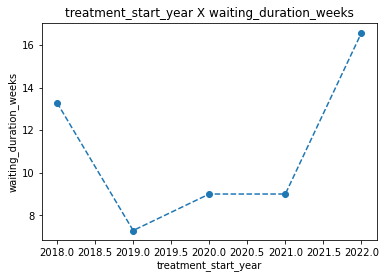

In [9]:
gb = df.groupby('treatment_start_year')['waiting_duration_weeks'].median()
print(gb)
x = gb.index.values
y = gb.values

result = pg.linear_regression(x, y)

display(result)

plt.plot(x,y, marker='o', linestyle='dashed',)
plt.xlabel("treatment_start_year")
plt.ylabel("waiting_duration_weeks")
plt.title("treatment_start_year X waiting_duration_weeks")
plt.show()

treatment_start_year
2018    17.214286
2019    10.000000
2020     4.000000
2021     6.500000
2022    12.928571
Name: waiting_duration_weeks, dtype: float64


,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,2448.557143,3579.787082,0.683995,0.543076,0.133946,-0.154739,-8943.923031,13841.037316
1,x1,-1.207143,1.772171,-0.681166,0.544634,0.133946,-0.154739,-6.846983,4.432697


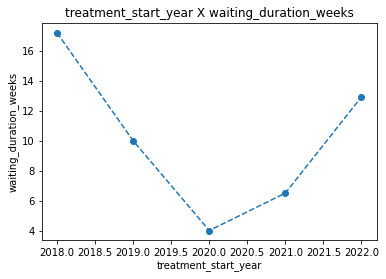

In [10]:
gb = df[df.treatment_type_renamed == 'TAU'].groupby('treatment_start_year')['waiting_duration_weeks'].median()
print(gb)
x = gb.index.values
y = gb.values

result = pg.linear_regression(x, y)

display(result)

plt.plot(x,y, marker='o', linestyle='dashed',)
plt.xlabel("treatment_start_year")
plt.ylabel("waiting_duration_weeks")
plt.title("treatment_start_year X waiting_duration_weeks")
plt.show()

treatment_start_year
2018     9.571429
2019     7.000000
2020    18.142857
2021    11.000000
2022    16.000000
Name: waiting_duration_weeks, dtype: float64


,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-3392.800000,2775.290111,-1.222503,0.308801,0.334133,0.112178,-12225.011759,5439.411759
1,x1,1.685714,1.373906,1.226951,0.307348,0.334133,0.112178,-2.686667,6.058095


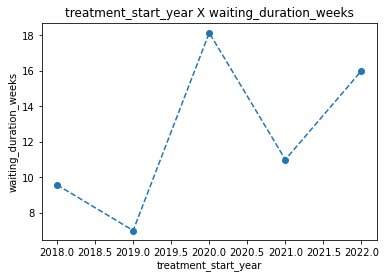

In [13]:
gb = df[df.treatment_type_renamed == 'IPT-SCI'].groupby('treatment_start_year')['waiting_duration_weeks'].median()
print(gb)
x = gb.index.values
y = gb.values

result = pg.linear_regression(x, y)

display(result)

plt.plot(x,y, marker='o', linestyle='dashed',)
plt.xlabel("treatment_start_year")
plt.ylabel("waiting_duration_weeks")
plt.title("treatment_start_year X waiting_duration_weeks")
plt.show()

In [14]:
pg.anova(data=df, dv='waiting_duration_weeks', between=['treatment_start_year', 'treatment_type_renamed'], ss_type=3).round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,treatment_start_year,476.984,4.0,119.246,0.411,0.801,0.012
1,treatment_type_renamed,23.531,1.0,23.531,0.081,0.776,0.001
2,treatment_start_year * treatment_type_renamed,2772.003,4.0,693.001,2.388,0.054,0.065
3,Residual,40054.158,138.0,290.248,NaN,NaN,NaN


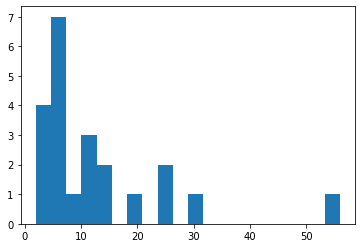

<Figure size 432x288 with 0 Axes>

In [13]:
for year in [2019]:#, 2020, 2021, 2022]:
    plt.hist(df[df.treatment_start_year == year].waiting_duration_weeks, bins=20)
    plt.show()
    plt.clf()

In [14]:
d = dtale.show(df)
d.open_browser()

In [15]:
? pg.anova

In [10]:
gb1 = df[df.treatment_type_renamed == 'TAU'].groupby('treatment_start_year')['waiting_duration_weeks'].median()
gb2 = df[df.treatment_type_renamed == 'IPT-SCI'].groupby('treatment_start_year')['waiting_duration_weeks'].median()
x1 = gb1.index.values
y1 = gb1.values
x2 = gb2.index.values
y2 = gb2.values


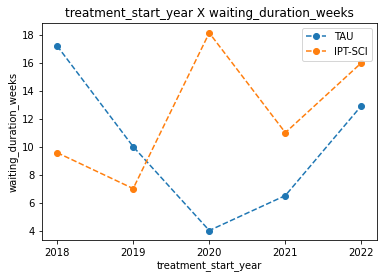

In [12]:

plt.plot(x1,y1, marker='o', linestyle='dashed', label='TAU')
plt.plot(x2,y2, marker='o', linestyle='dashed', label = 'IPT-SCI')
plt.xlabel("treatment_start_year")
plt.ylabel("waiting_duration_weeks")
plt.title("treatment_start_year X waiting_duration_weeks")
plt.xticks([2018, 2019, 2020, 2021, 2022])
plt.legend()
plt.show()